In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    closed = df.recovered+df.deaths
    hospitalized = df.confirmed - closed
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(closed,dashes=[2,2,6, 2],c='y',label='closed')
    plt.plot(hospitalized,dashes=[2,2,6, 2],c='b',label='hospitalized')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('closed: ',closed.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/closed.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('closed')
    plt.ylabel('deaths')
    plt.show()


In [3]:
# for c in json.columns:
#     print(c)


      date  confirmed  deaths  recovered
 2020-5-25       3042      57       2928
new  confirmed
       2.0


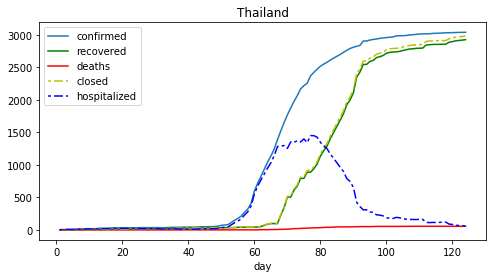

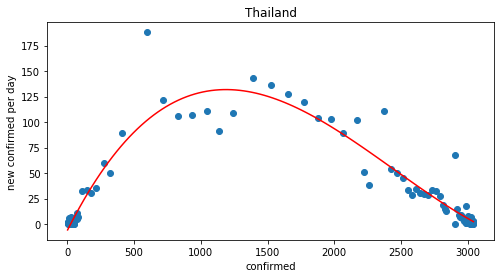

closed:  2985
deaths:  57
%:  1.9095477386934674


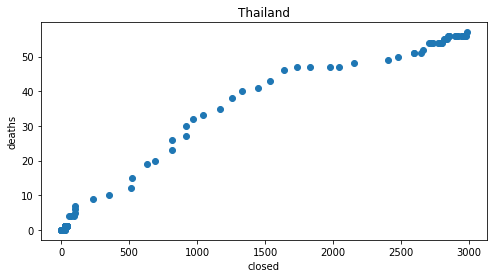

      date  confirmed  deaths  recovered
 2020-5-25     353427    3633     118798
new  confirmed
    8946.0


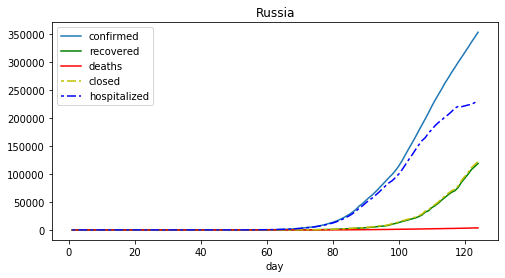

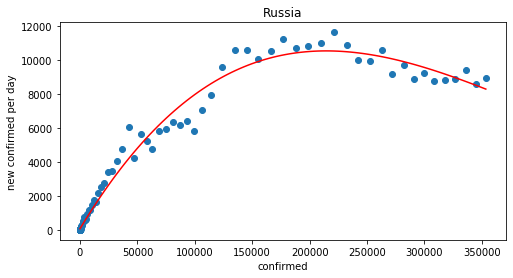

closed:  122431
deaths:  3633
%:  2.9673857111352517


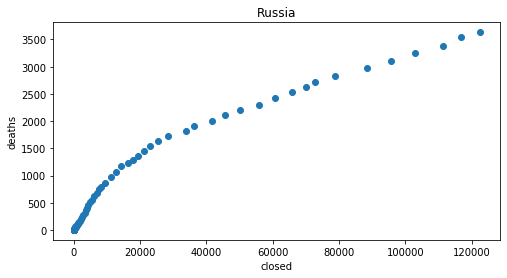

      date  confirmed  deaths  recovered
 2020-5-25      71105    7633      49452
new  confirmed
    2485.0


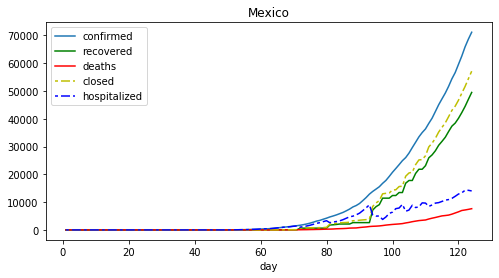

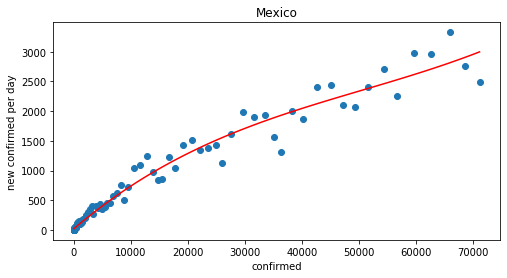

closed:  57085
deaths:  7633
%:  13.371288429534903


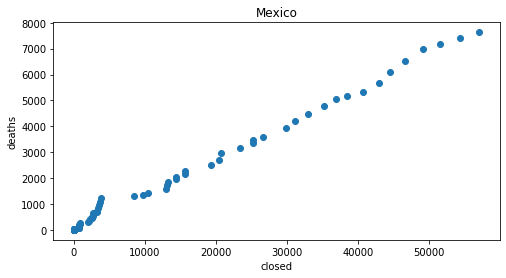

      date  confirmed  deaths  recovered
 2020-5-25     374898   23473     153833
new  confirmed
   11687.0


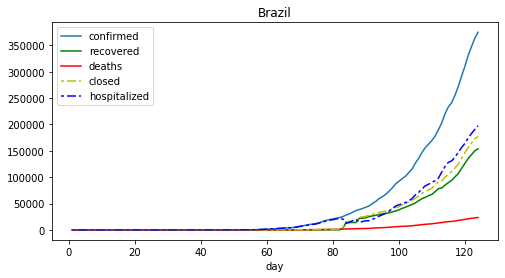

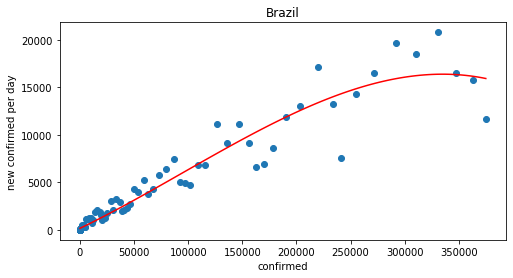

closed:  177306
deaths:  23473
%:  13.238694686023035


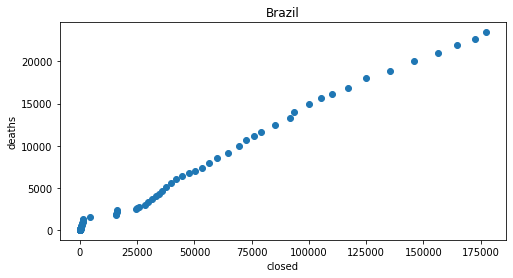

      date  confirmed  deaths  recovered
 2020-5-25       7417     115       5979
new  confirmed
     172.0


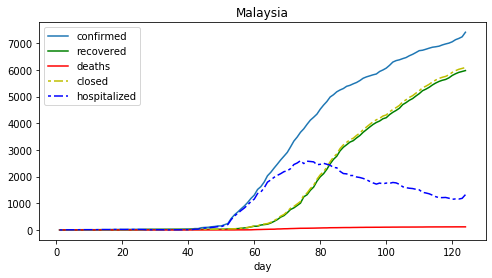

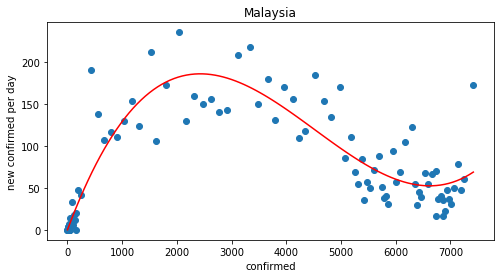

closed:  6094
deaths:  115
%:  1.8871020676074828


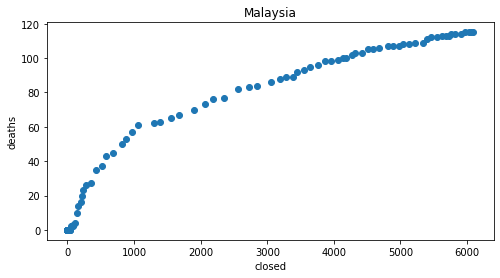

      date  confirmed  deaths  recovered
 2020-5-25      31960      23      15738
new  confirmed
     344.0


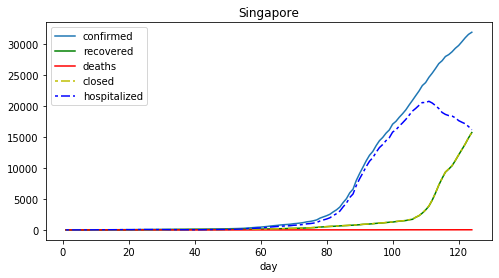

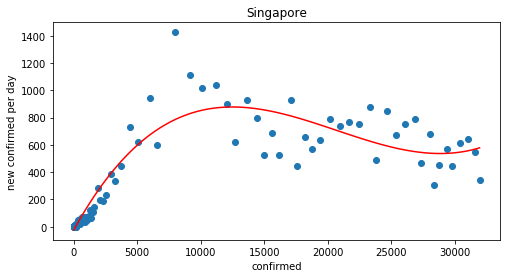

closed:  15761
deaths:  23
%:  0.14592982678764038


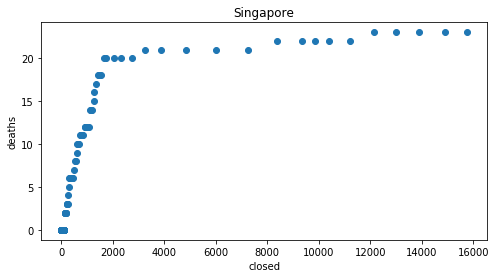

      date  confirmed  deaths  recovered
 2020-5-25      22750    1391       5642
new  confirmed
     479.0


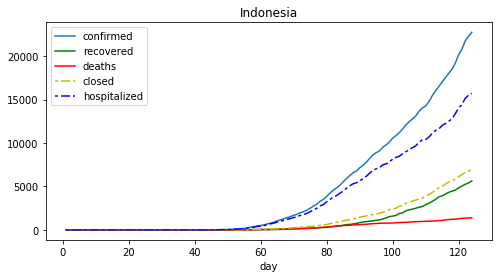

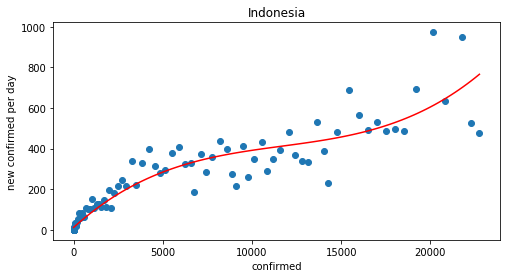

closed:  7033
deaths:  1391
%:  19.77818853974122


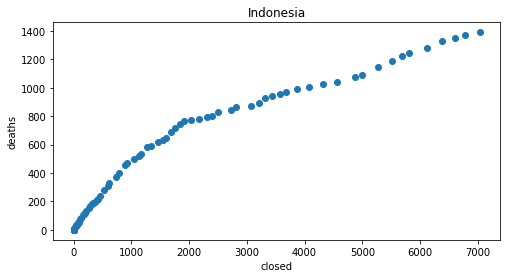

      date  confirmed  deaths  recovered
 2020-5-25    1662302   98220     379157
new  confirmed
   19056.0


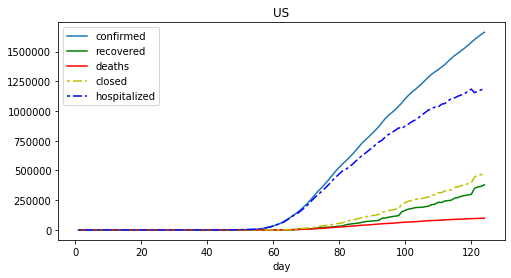

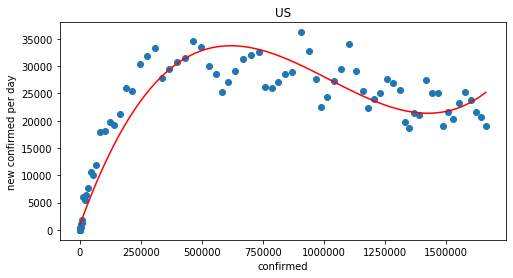

closed:  477377
deaths:  98220
%:  20.574933438351657


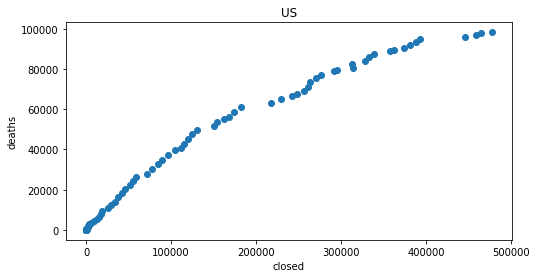

      date  confirmed  deaths  recovered
 2020-5-25      84102    4638      79352
new  confirmed
       7.0


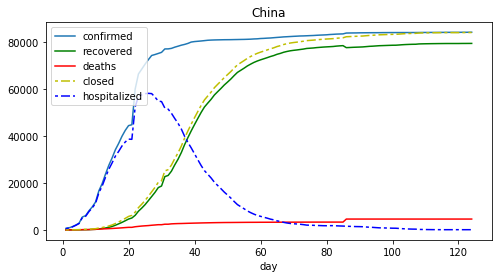

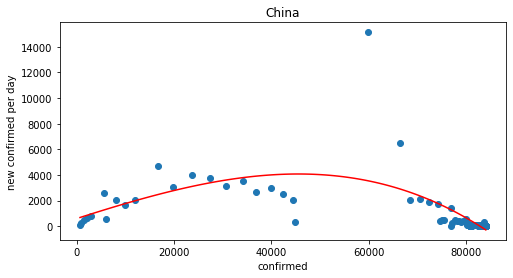

closed:  83990
deaths:  4638
%:  5.5220859626145975


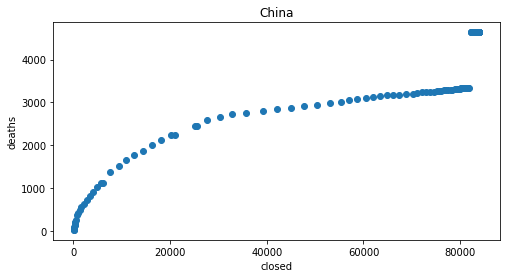

      date  confirmed  deaths  recovered
 2020-5-25      11225     269      10275
new  confirmed
      19.0


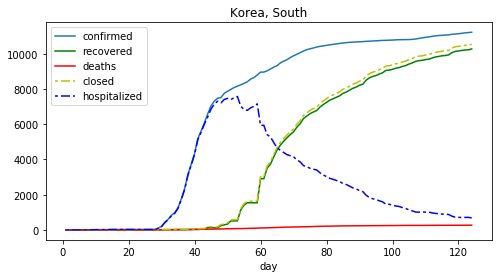

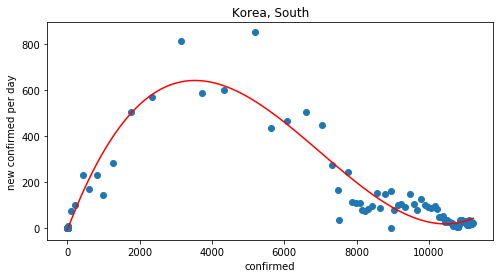

closed:  10544
deaths:  269
%:  2.5512139605462822


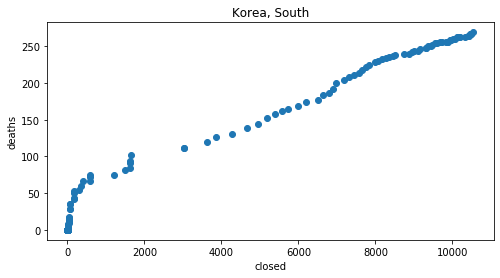

      date  confirmed  deaths  recovered
 2020-5-25     230158   32877     141981
new  confirmed
     300.0


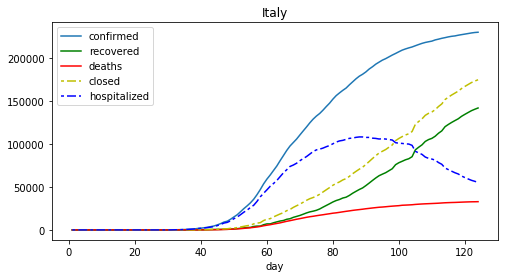

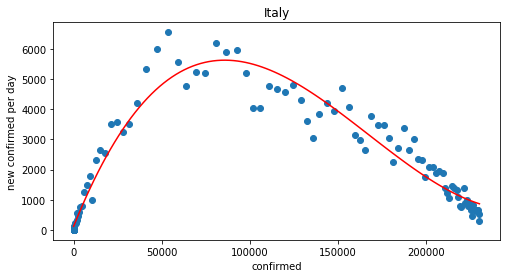

closed:  174858
deaths:  32877
%:  18.802113715128847


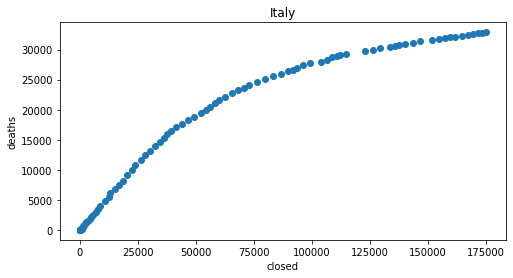

      date  confirmed  deaths  recovered
 2020-5-25     235400   26834     150376
new  confirmed
    -372.0


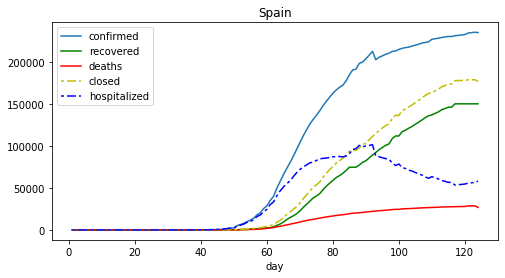

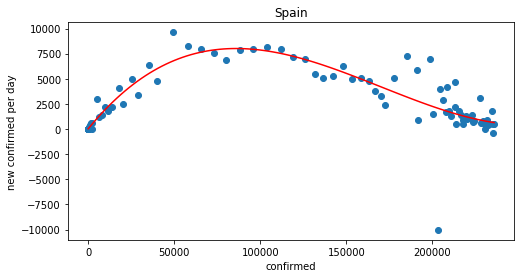

closed:  177210
deaths:  26834
%:  15.142486315670672


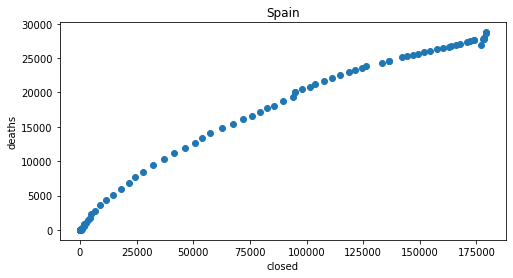

In [4]:
for c in ['Thailand','Russia','Mexico','Brazil','Malaysia','Singapore','Indonesia','US','China','Korea, South','Italy','Spain']:
    plot_country(c)
